## Importando librerías

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import ModelCheckpoint 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

### cargando dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


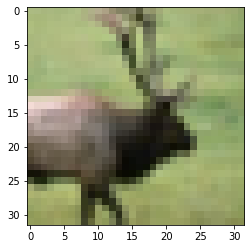

In [ ]:
plt.imshow(x_train[34])

### limpieza de datos

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
num_clases = len(np.unique(y_train)) 
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## normalización

In [ ]:
mean = np.mean(x_train)
std = np.std(x_train)

In [ ]:
x_train = (x_train - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

### creando set de datos

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape', x_train.shape)

print('train;', x_train.shape[0])
print('val;', x_valid.shape[0])
print('test;', x_test.shape[0])

x_train shape (45000, 32, 32, 3)
train; 45000
val; 5000
test; 10000


### construyendo el modelo

In [ ]:
base_filtros = 32
w_regulatizer = 1e-4

In [ ]:
x_train.shape[1:]

(32, 32, 3)

In [ ]:
model = Sequential()
## conv 1
model.add(Conv2D(base_filtros, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())


## conv 6
model.add(Conv2D(4*base_filtros, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#Capa - Flatten

model.add(Flatten()) 
model.add(Dense(num_clases,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

### data augmentation

In [ ]:
datagen = ImageDataGenerator(rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip=True,
                  vertical_flip=True)

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

### callbacks

In [ ]:
chekcpoint = ModelCheckpoint('mi_mejor_modelo.hdf5',verbose=1,save_best_only=True, monitor = 'val_accuracy')


### entrenando el modelo

In [ ]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=128),
          callbacks=[chekcpoint],
          steps_per_epoch=x_train.shape[0] // 128, 
          epochs=120,
          verbose=2,
          validation_data=(x_valid, y_valid)
         )

Epoch 1/120

Epoch 1: val_accuracy improved from -inf to 0.33800, saving model to mi_mejor_modelo.hdf5
351/351 - 34s - loss: 2.2058 - accuracy: 0.3299 - val_loss: 1.9400 - val_accuracy: 0.3380 - 34s/epoch - 97ms/step
Epoch 2/120

Epoch 2: val_accuracy improved from 0.33800 to 0.45780, saving model to mi_mejor_modelo.hdf5
351/351 - 22s - loss: 1.7429 - accuracy: 0.4303 - val_loss: 1.6951 - val_accuracy: 0.4578 - 22s/epoch - 62ms/step
Epoch 3/120

Epoch 3: val_accuracy improved from 0.45780 to 0.51640, saving model to mi_mejor_modelo.hdf5
351/351 - 21s - loss: 1.5563 - accuracy: 0.4884 - val_loss: 1.5345 - val_accuracy: 0.5164 - 21s/epoch - 60ms/step
Epoch 4/120

Epoch 4: val_accuracy improved from 0.51640 to 0.59120, saving model to mi_mejor_modelo.hdf5
351/351 - 23s - loss: 1.4116 - accuracy: 0.5392 - val_loss: 1.2567 - val_accuracy: 0.5912 - 23s/epoch - 66ms/step
Epoch 5/120

Epoch 5: val_accuracy improved from 0.59120 to 0.62000, saving model to mi_mejor_modelo.hdf5
351/351 - 22s - l

### evaluación

In [ ]:
def plot_graf(hist, metrics):
  plt.plot(hist.history[metrics])
  plt.plot(hist.history['val_'+ metrics], '')
  plt.ylabel(metrics) 
  plt.xlabel('Epoch' )
  plt.legend([metrics,'val_'+ metrics])  

(0.0, 0.8676064267754555)

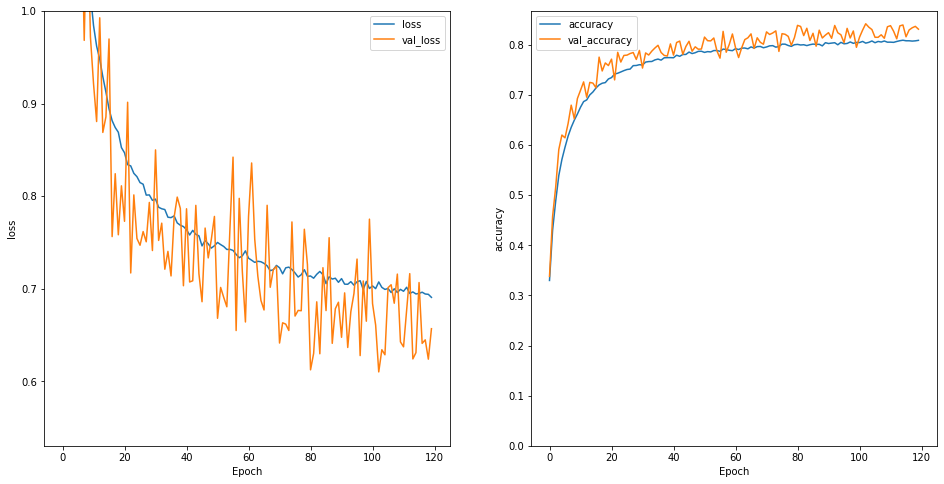

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graf(hist, 'loss')
plt.ylim(None, 1)
plt.subplot(1,2,2)
plot_graf(hist, 'accuracy')
plt.ylim(0, None)

In [ ]:
model2 = model

In [ ]:
model2.load_weights('./mi_mejor_modelo.hdf5')

In [ ]:
test_loss, test_acc = model2.evaluate(x_test,y_test)
print('perdida : {}'.format(test_loss))
print('exactitud : {}'.format(test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.6418 - accuracy: 0.8285
perdida : 0.641776978969574
exactitud : 0.828499972820282


In [ ]:
predictions = model2.predict(x_test)
print(predictions[0])

[6.3461874e-07 1.6953250e-05 4.9307378e-04 9.9752086e-01 1.7873412e-05
 1.4098235e-03 5.1708368e-04 7.9528036e-06 1.1018800e-05 4.8532243e-06]
